In [2]:
import pandas as pd

In [3]:
# we will continue to work with 2018, location is Hanoi
year = 2018
site = 488200 # NOIBAI AIRPORT
base_url = f'https://www.ncei.noaa.gov/data/global-hourly/access/{year}/{site}99999.csv'

In [4]:
df = pd.read_csv(base_url)
df.head()

,STATION,DATE,SOURCE,LATITUDE,LONGITUDE,ELEVATION,NAME,REPORT_TYPE,CALL_SIGN,QUALITY_CONTROL,...,GA4,GE1,GF1,MA1,MW1,MW2,MW3,OC1,REM,EQD
0,48820099999,2018-01-01T00:00:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,01067,1,99,9,99,9","10190,1,99999,9",NaN,NaN,NaN,NaN,MET057METAR VVNB 010000Z 08003KT 8000 BKN035 1...,NaN
1,48820099999,2018-01-01T00:30:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,00975,1,99,9,99,9","10190,1,99999,9",NaN,NaN,NaN,NaN,MET057METAR VVNB 010030Z 06003KT 8000 BKN032 1...,NaN
2,48820099999,2018-01-01T01:00:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,00975,1,99,9,99,9","10200,1,99999,9",NaN,NaN,NaN,NaN,MET057METAR VVNB 010100Z 08003KT 7000 BKN032 1...,NaN
3,48820099999,2018-01-01T01:30:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,AGL ,+99999,+99999","99,99,9,07,1,99,9,00975,1,99,9,99,9","10200,1,99999,9",NaN,NaN,NaN,NaN,MET065METAR VVNB 010130Z 06004KT 360V080 7000 ...,NaN
4,48820099999,2018-01-01T02:00:00,4,21.221192,105.807178,11.88,"NOIBAI INTERNATIONAL, VM",FM-15,99999,V020,...,NaN,"9,AGL ,+99999,+99999","99,99,9,04,1,99,9,00762,1,99,9,99,9","10200,1,99999,9",NaN,NaN,NaN,NaN,MET064METAR VVNB 010200Z 08006KT 7000 SCT025 B...,NaN


In [5]:
# or value of one row
df.iloc[0]

STATION                                                  48820099999
DATE                                             2018-01-01T00:00:00
SOURCE                                                             4
LATITUDE                                                   21.221192
LONGITUDE                                                 105.807178
ELEVATION                                                      11.88
NAME                                        NOIBAI INTERNATIONAL, VM
REPORT_TYPE                                                    FM-15
CALL_SIGN                                                      99999
QUALITY_CONTROL                                                 V020
WND                                                   080,1,N,0015,1
CIG                                                      01067,1,C,N
VIS                                                     008000,1,9,9
TMP                                                          +0160,1
DEW                               

In [6]:
# let save the raw file, so if you want to work on it directly,
df.to_csv('data/noibai_noaa_isd_2018.csv', index=False)

In [7]:
# and read again, this time from local file
df = pd.read_csv('data/noibai_noaa_isd_2018.csv')

In [8]:
# a few exploratory functions
df.columns

Index(['STATION', 'DATE', 'SOURCE', 'LATITUDE', 'LONGITUDE', 'ELEVATION',
       'NAME', 'REPORT_TYPE', 'CALL_SIGN', 'QUALITY_CONTROL', 'WND', 'CIG',
       'VIS', 'TMP', 'DEW', 'SLP', 'ED1', 'GA1', 'GA2', 'GA3', 'GA4', 'GE1',
       'GF1', 'MA1', 'MW1', 'MW2', 'MW3', 'OC1', 'REM', 'EQD'],
      dtype='object')

In [9]:
df.shape

(17291, 30)

In [10]:
df.describe()

,STATION,SOURCE,LATITUDE,LONGITUDE,ELEVATION,CALL_SIGN
count,1.729100e+04,17291.0,1.729100e+04,1.729100e+04,1.729100e+04,17291.0
mean,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
std,0.000000e+00,0.0,3.552816e-15,1.421127e-14,3.552816e-15,0.0
min,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
25%,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
50%,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
75%,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0
max,4.882010e+10,4.0,2.122119e+01,1.058072e+02,1.188000e+01,99999.0


In [11]:
# now will want to create a list of columns that contain Wind, Temperature and relevant data
cols = ['DATE', 'WND', 'CIG', 'VIS', 'TMP', 'DEW', 'GA1']

In [12]:
# and select those columns, reassign to the df name
df = df[cols]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17291 entries, 0 to 17290
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   DATE    17291 non-null  object
 1   WND     17291 non-null  object
 2   CIG     17291 non-null  object
 3   VIS     17291 non-null  object
 4   TMP     17291 non-null  object
 5   DEW     17291 non-null  object
 6   GA1     12155 non-null  object
dtypes: object(7)
memory usage: 945.7+ KB


In [14]:
df.head(3)

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1","01067,1,C,N","008000,1,9,9","+0160,1","+0120,1","07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1","00975,1,C,N","008000,1,9,9","+0160,1","+0120,1","07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1","00975,1,C,N","007000,1,9,9","+0160,1","+0120,1","07,1,+00975,1,99,9"


In [15]:
# again a smaller file, just in case you need it later
df.to_csv('data/reduced_noibai_noaa_isd_2018_2.csv', index=False)

**Wait, each column contains other types of data rather numeric values!!**

- yes, they are formatted with a QA/QC inplace
- let take sometime to read through a description for one parameter, in this case `TMP` or air temperature

**Time to read some manual**, here is what I found for **TMP** term, more on [ncei.noaa.gov]  (https://www.ncei.noaa.gov/data/global-hourly/doc/isd-format-document.pdf) 

**POS: 88-92**
    **AIR-TEMPERATURE-OBSERVATION air temperature**  
    
     The temperature of the air.  
     MIN: -0932 MAX: +0618 UNITS: Degrees Celsius  
     SCALING FACTOR: 10  
     DOM: A general domain comprised of the numeric characters (0-9), a plus sign (+), and a minus sign (-). +9999 = Missing.  

**POS: 93-93**
    **AIR-TEMPERATURE-OBSERVATION air temperature quality code**  
    
     The code that denotes a quality status of an AIR-TEMPERATURE-OBSERVATION.  
     DOM: A specific domain comprised of the characters in the ASCII character set.  
     
     0 = Passed gross limits check  
     1 = Passed all quality control checks  
     2 = Suspect  
     3 = Erroneous  
     4 = Passed gross limits check, data originate from an NCEI data source  
     5 = Passed all quality control checks, data originate from an NCEI data source  
     6 = Suspect, data originate from an NCEI data source  
     7 = Erroneous, data originate from an NCEI data source  
     9 = Passed gross limits check if element is present  
     A = Data value flagged as suspect, but accepted as a good value  
     C = Temperature and dew point received from Automated Weather Observing System (AWOS) are reported in  
        whole degrees Celsius. Automated QC flags these values, but they are accepted as valid.  
     I = Data value not originally in data, but inserted by validator  
     M = Manual changes made to value based on information provided by NWS or FAA  
     P = Data value not originally flagged as suspect, but replaced by validator  
     R = Data value replaced with value computed by NCEI software  
     U = Data value replaced with edited value  
     
*so if the value code is **3**, or **7**, the data should not be used*, let see what the distribution of the quality code on **TMP**

In [16]:
# let work on TMP by first splitting each column by the comma, the option expand=True, as the name implies
# expand each field to a columns
df['TMP'].str.split(pat=',', expand=True).sample(5)

,0,1
10570,+0270,1
3046,+0240,1
14030,+0280,1
3114,+0260,1
14981,+0260,1


In [17]:
df['TMP'].str.split(pat=',', expand=True)[1].value_counts(normalize=True)
# for the file I were working on, only a few instance with code 5, so the TMP will be processed as it is

1
1    0.999132
5    0.000521
2    0.000347
Name: proportion, dtype: float64

In [18]:
# the scaling factor is 10, to take temperature,
# 1. take the first element
# 2. cast type is int(eger)
# 3. deviding to 10
df['TMP'].str.split(pat=',', expand=True)[0].astype(int)/10

0        16.0
1        16.0
2        16.0
3        17.0
4        17.0
         ... 
17286    11.0
17287    11.0
17288    11.0
17289    11.0
17290    11.0
Name: 0, Length: 17291, dtype: float64

In [19]:
# and assign processed value back to the columns
df['TMP'] = df['TMP'].str.split(pat=',', expand=True)[0].astype(int)/10
df.head(3)

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1","01067,1,C,N","008000,1,9,9",16.0,"+0120,1","07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1","00975,1,C,N","008000,1,9,9",16.0,"+0120,1","07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1","00975,1,C,N","007000,1,9,9",16.0,"+0120,1","07,1,+00975,1,99,9"


In [20]:
# Dewpoint temperature is processed the same way
df['DEW'] = df['DEW'].str.split(pat=',', expand=True)[0].astype(int)/10
df.head(3)

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1","01067,1,C,N","008000,1,9,9",16.0,12.0,"07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1","00975,1,C,N","008000,1,9,9",16.0,12.0,"07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1","00975,1,C,N","007000,1,9,9",16.0,12.0,"07,1,+00975,1,99,9"


In [21]:
# What is this parameter?
df['CIG']

0        01067,1,C,N
1        00975,1,C,N
2        00975,1,C,N
3        00975,1,C,N
4        01006,1,9,N
            ...     
17286    01250,1,C,N
17287    01250,1,C,N
17288    01219,1,C,N
17289    01219,1,C,N
17290    01158,1,C,N
Name: CIG, Length: 17291, dtype: object

here is the definition from [weather.gove](https://forecast.weather.gov/glossary.php?word=cig) 
 > CIG: Ceiling- The height of the lowest layer of clouds, when the sky is broken or overcast.

**POS: 71-75** 
 **SKY-CONDITION-OBSERVATION ceiling height dimension**  
 
    The height above ground level (AGL) of the lowest cloud or obscuring phenomena layer aloft with 5/8 or more summation total skycover, which may be predominantly opaque, or the vertical visibility into a surface-based obstruction. 
    Unlimited = 22000. MIN: 00000 MAX: 22000 UNITS: Meters  
    SCALING FACTOR: 1  
    DOM: A general domain comprised of the numeric characters (0-9).  
    99999 = Missing.  

In [22]:
# we have 2/3 data is passed with confident, and 1/3 is take-it-as-it-is
df['CIG'].str.split(pat=',', expand=True)[1].value_counts()

1
1    11211
9     6080
Name: count, dtype: int64

In [23]:
df['CIG'].str.split(pat=',', expand=True)[0].astype(int)

0        1067
1         975
2         975
3         975
4        1006
         ... 
17286    1250
17287    1250
17288    1219
17289    1219
17290    1158
Name: 0, Length: 17291, dtype: int64

In [24]:
 df['CIG'] =  df['CIG'].str.split(pat=',', expand=True)[0].astype(int)

In [25]:
df.query('CIG==99999')

,DATE,WND,CIG,VIS,TMP,DEW,GA1
330,2018-01-07T21:30:00,"100,1,N,0026,1",99999,"001500,1,9,9",21.0,20.0,"04,1,+00091,1,99,9"
405,2018-01-09T11:00:00,"020,1,N,0015,1",99999,"009900,1,9,9",13.0,5.0,NaN
406,2018-01-09T11:30:00,"020,1,N,0015,1",99999,"009900,1,9,9",13.0,6.0,NaN
407,2018-01-09T12:00:00,"999,9,V,0010,1",99999,"009900,1,9,9",13.0,6.0,NaN
408,2018-01-09T12:30:00,"080,1,N,0015,1",99999,"009900,1,9,9",13.0,6.0,NaN
...,...,...,...,...,...,...,...
17273,2018-12-31T15:00:00,"060,1,N,0026,1",99999,"009900,1,9,9",12.0,5.0,NaN
17274,2018-12-31T15:30:00,"070,1,N,0026,1",99999,"009900,1,9,9",12.0,5.0,NaN
17275,2018-12-31T16:00:00,"060,1,V,0015,1",99999,"009900,1,9,9",12.0,6.0,NaN
17276,2018-12-31T16:30:00,"030,1,N,0026,1",99999,"009900,1,9,9",12.0,6.0,NaN


In [26]:
# and assign any value with 99999 (missing) as None (or null)
df.loc[df['CIG'] == 99999, 'CIG'] = None

<Axes: >

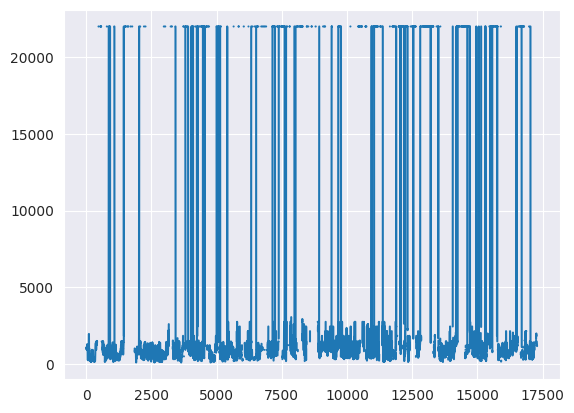

In [27]:
df['CIG'].plot(kind='line')

- we see many place with above 20000 (meter). Those are from 22000 value with a clear sky

next is **VIS** (visiblity)

**POS: 79-84**
    **VISIBILITY-OBSERVATION distance dimension**  
    
     The horizontal distance at which an object can be seen and identified.  
     MIN: 000000 MAX: 160000 UNITS: Meters  
     DOM: A general domain comprised of the numeric characters (0-9).  
     Missing = 999999  
     NOTE: Values greater than 160000 are entered as 160000 

In [28]:
 df['VIS'] =  df['VIS'].str.split(pat=',', expand=True)[0].astype(int)

In [29]:
df.head()

,DATE,WND,CIG,VIS,TMP,DEW,GA1
0,2018-01-01T00:00:00,"080,1,N,0015,1",1067.0,8000,16.0,12.0,"07,1,+01067,1,99,9"
1,2018-01-01T00:30:00,"060,1,N,0015,1",975.0,8000,16.0,12.0,"07,1,+00975,1,99,9"
2,2018-01-01T01:00:00,"080,1,N,0015,1",975.0,7000,16.0,12.0,"07,1,+00975,1,99,9"
3,2018-01-01T01:30:00,"060,1,V,0021,1",975.0,7000,17.0,12.0,"07,1,+00975,1,99,9"
4,2018-01-01T02:00:00,"080,1,N,0031,1",1006.0,7000,17.0,12.0,"04,1,+00762,1,99,9"


In [30]:
# and wind
df['WND'].str.split(pat=',', expand=True)

,0,1,2,3,4
0,080,1,N,0015,1
1,060,1,N,0015,1
2,080,1,N,0015,1
3,060,1,V,0021,1
4,080,1,N,0031,1
...,...,...,...,...,...
17286,020,1,N,0031,1
17287,030,1,N,0036,1
17288,020,1,N,0031,1
17289,030,1,N,0031,1


**format**  
0 - the angle 
1 - quality code for the wind direction  
2 - characters of this observation (N for Normal, V for Variable, C: Calm)  
3 - Wind speed (m/s), scaling factor of 10  
4 - Quality code for windspeed  

In [31]:
 df['WND'].str.split(pat=',', expand=True)[1].value_counts()

1
1    15559
9     1732
Name: count, dtype: int64

In [32]:
 df['WND'].str.split(pat=',', expand=True)[2].value_counts()

2
N    9054
V    8118
C     119
Name: count, dtype: int64

In [33]:
 df['WND'].str.split(pat=',', expand=True)[4].value_counts()

4
1    17285
9        6
Name: count, dtype: int64

In [35]:
# look data is good quality
 df['WD'] =  df['WND'].str.split(pat=',', expand=True)[0].astype(int)

IndentationError: unexpected indent (1039568751.py, line 2)

In [34]:
 df['WS'] = df['WND'].str.split(pat=',', expand=True)[3].astype(int)/10

In [35]:
df.head()

,DATE,WND,CIG,VIS,TMP,DEW,GA1,WD,WS
0,2018-01-01T00:00:00,"080,1,N,0015,1",1067.0,8000,16.0,12.0,"07,1,+01067,1,99,9",80,1.5
1,2018-01-01T00:30:00,"060,1,N,0015,1",975.0,8000,16.0,12.0,"07,1,+00975,1,99,9",60,1.5
2,2018-01-01T01:00:00,"080,1,N,0015,1",975.0,7000,16.0,12.0,"07,1,+00975,1,99,9",80,1.5
3,2018-01-01T01:30:00,"060,1,V,0021,1",975.0,7000,17.0,12.0,"07,1,+00975,1,99,9",60,2.1
4,2018-01-01T02:00:00,"080,1,N,0031,1",1006.0,7000,17.0,12.0,"04,1,+00762,1,99,9",80,3.1


In [36]:
df.drop(columns=['WND'], inplace=True)
df.head(3)

,DATE,CIG,VIS,TMP,DEW,GA1,WD,WS
0,2018-01-01T00:00:00,1067.0,8000,16.0,12.0,"07,1,+01067,1,99,9",80,1.5
1,2018-01-01T00:30:00,975.0,8000,16.0,12.0,"07,1,+00975,1,99,9",60,1.5
2,2018-01-01T01:00:00,975.0,7000,16.0,12.0,"07,1,+00975,1,99,9",80,1.5


**FLD LEN: 3**
 **SKY-COVER-LAYER identifier**
 
     The identifier that represents a SKY-COVER-LAYER.
     DOM: A specific domain comprised of the characters in the ASCII character set.
     GA1-GA6 An indicator of up to 6 repeating fields of the following items:
     SKY-COVER-LAYER coverage code
     SKY-COVER-LAYER coverage quality code
     SKY-COVER-LAYER base height dimension
     SKY-COVER-LAYER base height quality code
     SKY-COVER-LAYER cloud type code
     SKY-COVER-LAYER cloud type quality code

**SKY-COVER-LAYER coverage code**

     The code that denotes the fraction of the total celestial dome covered by a SKY-COVER-LAYER.
     Note: This is for a discrete cloud layer, as opposed to the cloud later summation data in the GD1-GD6 section.

**SKY-COVER-LAYER base height dimension**

     The height relative to a VERTICAL-REFERENCE-DATUM of the lowest surface of a cloud.
     MIN: -00400 MAX: +35000 UNITS: Meters
     SCALING FACTOR: 1
     DOM: A general domain comprised of the numeric characters (0-9), a plus sign (+), and a minus sign (-).
     +99999 = Missing
 
 https://www.ngs.noaa.gov/datums/vertical/#:~:text=A%20vertical%20datum%20is%20a,the%20surface%20of%20the%20earth.

In [37]:
# let split out GA columns
df['GA1'].str.split(pat=',', expand=True)[4].value_counts()

99    11390
08      250
09      213
Name: 4, dtype: int64

In [38]:
df['GA1'].str.split(pat=',', expand=True)[1].value_counts()

1    11853
Name: 1, dtype: int64

In [39]:
df['CLDCR'] = df['GA1'].str.split(pat=',', expand=True)[0].astype(float)/10

In [40]:
df['CLDHT'] = df['GA1'].str.split(pat=',', expand=True)[2].astype(float)

In [41]:
# and convert DATE column to proper data type
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)

In [42]:
df.drop(columns=['GA1'], inplace=True)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 16911 entries, 2018-01-01 00:00:00 to 2018-12-31 23:30:00
Data columns (total 8 columns):
CIG      10942 non-null float64
VIS      16911 non-null int64
TMP      16911 non-null float64
DEW      16911 non-null float64
WD       16911 non-null int64
WS       16911 non-null float64
CLDCR    11853 non-null float64
CLDHT    11853 non-null float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [44]:
# and save to file
df.to_csv('data/cleaned_noibai_noaa_isd_2018.csv')